<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name', 'CPLEXStatus','type']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

shuffled = shuffled.drop(['CPLEXStatus', 'indeks', 'index', 'inst.name', 'type', 'subtype', 'class', 'm', '(n/m)^2'], axis = 1)
shuffled = shuffled.drop(['(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'av.length', 'median', 'range', 'min', 'max'], axis = 1)

print(shuffled.head())

     n   n/m     std.dev    k            y
0  160  5.00   29.158621   84   317.811737
1  126  9.00   48.377693   98  1237.184082
2  120  2.50  110.879463  104    24.731535
3  180  6.00   46.917538  112  1529.954346
4  132  2.75   15.072780   45    31.075651


In [2]:
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new
shuffled = shuffled.drop(['y'], axis=1)
shuffled['combined'] = shuffled['std.dev']*200 + shuffled['k']
shuffled = shuffled.drop(['std.dev', 'k'], axis=1)
shuffled = shuffled[['n', 'n/m', 'combined', 'y_new']]
print(shuffled.head())

     n   n/m    combined  y_new
0  160  5.00   5915.7242      2
1  126  9.00   9773.5386      3
2  120  2.50  22279.8926      1
3  180  6.00   9495.5076      3
4  132  2.75   3059.5560      1


In [7]:
n_array = shuffled['n'].to_numpy()
ratio_array = shuffled['n/m'].to_numpy()
combined_array = shuffled['combined'].to_numpy()
y_new_array = shuffled['y_new'].to_numpy()

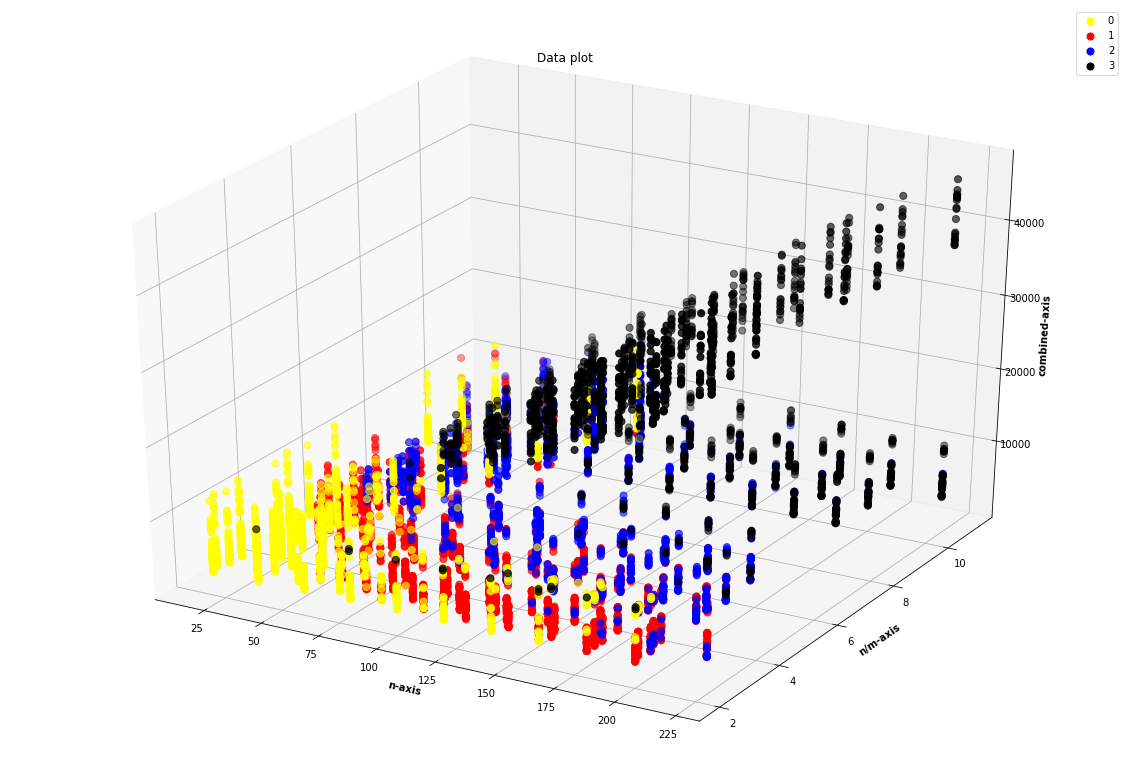

In [21]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (20, 14))
ax = plt.axes(projection ="3d")
   
ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
n_array0 = []
ratio_array0 = []
combined_array0 = []
for i in range(len(y_new_array)):
  if(y_new_array[i] == 0):
    n_array0.append(n_array[i])
    ratio_array0.append(ratio_array[i])
    combined_array0.append(combined_array[i]) 

n_array1 = []
ratio_array1 = []
combined_array1 = []
for i in range(len(y_new_array)):
  if(y_new_array[i] == 1):
    n_array1.append(n_array[i])
    ratio_array1.append(ratio_array[i])
    combined_array1.append(combined_array[i]) 

n_array2 = []
ratio_array2 = []
combined_array2 = []
for i in range(len(y_new_array)):
  if(y_new_array[i] == 2):
    n_array2.append(n_array[i])
    ratio_array2.append(ratio_array[i])
    combined_array2.append(combined_array[i]) 

n_array3 = []
ratio_array3 = []
combined_array3 = []
for i in range(len(y_new_array)):
  if(y_new_array[i] == 3):
    n_array3.append(n_array[i])
    ratio_array3.append(ratio_array[i])
    combined_array3.append(combined_array[i]) 


# moguce je selektivno plotovanje
ax.scatter3D(n_array0, ratio_array0, combined_array0, s = 50, color = 'yellow')
ax.scatter3D(n_array1, ratio_array1, combined_array1, s = 50, color = 'red')
ax.scatter3D(n_array2, ratio_array2, combined_array2, s = 50, color = 'blue')
ax.scatter3D(n_array3, ratio_array3, combined_array3, s = 50, color = 'black')


plt.title("Data plot")
ax.set_xlabel('n-axis', fontweight ='bold')
ax.set_ylabel('n/m-axis', fontweight ='bold')
ax.set_zlabel('combined-axis', fontweight ='bold')
#fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
ax.legend(['0', '1', '2', '3'])
 
# show plot
plt.show()